In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

завантажити файли movies.dat / ratings.dat / users.dat у змінні, використовуючи методи pandas

In [24]:
movies = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin1')
ratings = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin1')
users = pd.read_csv('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='latin1')

Зробити merge даних в єдиний DataFrame

In [28]:
merged_data = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')
merged_data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


аналіз топ-10 стрічок за рейтингом по кожному полу та кожній віковій підгрупі з розбивкою по статі

In [31]:
ageGroupList=[1,18,25,35,45,50,56]

def RatingByAgeForGender(data, gender):
    resultRating = {}

    genderData = data[data['Gender'] == gender]

    for index, ageGroup in enumerate(ageGroupList):

        genderDataForAge = genderData[genderData["Age"] == ageGroup]
        ratingCount = genderDataForAge.groupby(['MovieID'])['Rating'].count()
        filterMovieIds = ratingCount[ratingCount >= 20].index.tolist()
        filterData = genderDataForAge[genderDataForAge['MovieID'].isin(filterMovieIds)]
        rating = filterData.groupby(['Title'])['Rating'].mean().nlargest(10).reset_index()
        
        resultRating[f'{ageGroupList[index]}'] = rating
        
    return resultRating

genderAgeRating = RatingByAgeForGender(merged_data, 'M')
genderAgeRating

{'1':                               Title    Rating
 0                 GoodFellas (1990)  4.863636
 1             Apocalypse Now (1979)  4.727273
 2            American Beauty (1999)  4.629032
 3             Godfather, The (1972)  4.589744
 4                 Annie Hall (1977)  4.571429
 5  Shawshank Redemption, The (1994)  4.545455
 6          Full Metal Jacket (1987)  4.523810
 7   Ferris Bueller's Day Off (1986)  4.500000
 8                Matrix, The (1999)  4.487805
 9               Shining, The (1980)  4.476190,
 '18':                                                Title    Rating
 0                         Usual Suspects, The (1995)  4.700658
 1                   Shawshank Redemption, The (1994)  4.699708
 2  Seven Samurai (The Magnificent Seven) (Shichin...  4.635135
 3                              Godfather, The (1972)  4.570470
 4                              Close Shave, A (1995)  4.550562
 5                             American Beauty (1999)  4.540643
 6                     

Візуалізувати один із рейтингів засобами пакету seaborn

C:\Temp\ipykernel_24244\833491889.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Rating', hue='Gender', data=merged_data, ci=None, estimator=np.mean)
c:\Users\LENOVO Y\miniconda3\envs\labi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO Y\miniconda3\envs\labi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO Y\miniconda3\envs\labi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.ap

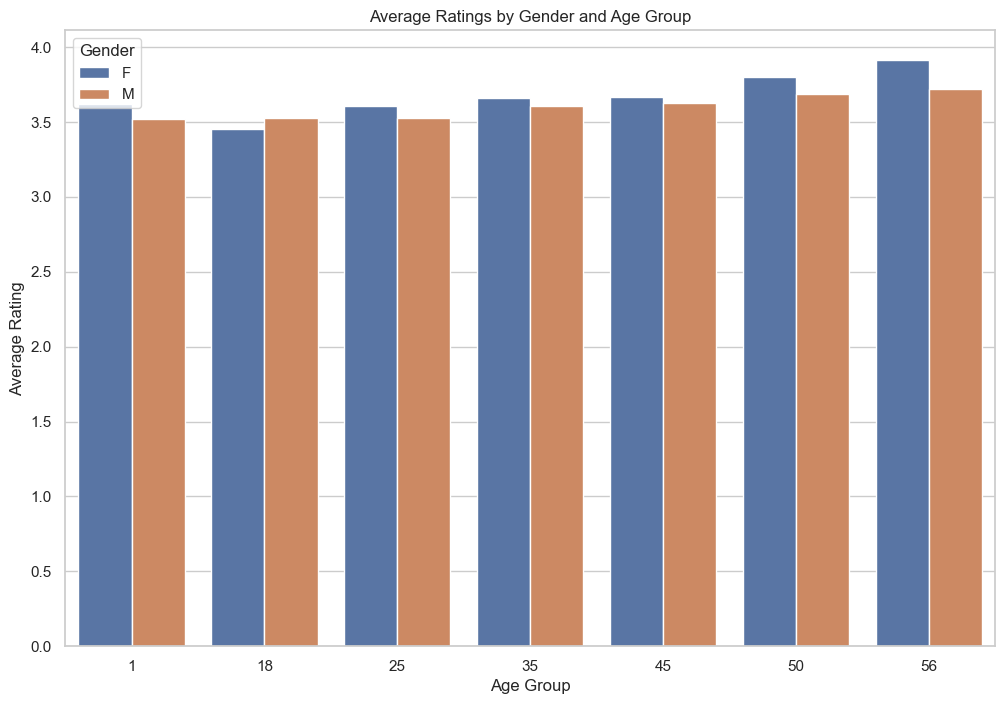

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Rating', hue='Gender', data=merged_data, ci=None, estimator=np.mean)
plt.title('Average Ratings by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()